In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

####  Loading the Data

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
label = df[df.columns[4]].values

#### One Hot Encoding

In [5]:
oneHot_encoding = pd.get_dummies(df['State'])

In [6]:
oneHot_encoding.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [7]:
df2 = pd.concat([df, oneHot_encoding], axis=1)

In [8]:
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [9]:
df2.drop(['State', 'Profit'], axis=1, inplace=True)

In [10]:
df2.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


####  Defining features & labels

In [11]:
features = df2[df2.columns[:]].values

In [12]:
features

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [13]:
label

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

#### Normalizig both Features & Label

In [14]:
mu = np.mean(features, axis=0)
sigma = np.std(features, axis=0)
normalized_features = (features - mu)/sigma

In [15]:
mu = np.mean(label, axis=0)
sigma = np.std(label, axis=0)
label = (label - mu)/sigma

In [16]:
normalized_features

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
        -7.17740563e-01, -6.85994341e-01,  1.39326109e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.39326109e+00, -6.85994341e-01, -7.17740563e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
        -7.17740563e-01,  1.45773797e+00, -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -7.17740563e-01, -6.85994341e-01,  1.39326109e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
        -7.17740563e-01,  1.45773797e+00, -7.17740563e-01],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
        -7.17740563e-01, -6.85994341e-01,  1.39326109e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.39326109e+00, -6.85994341e-01, -7.17740563e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
        -7.17740563e-01,  1.45773797e+00, -7.17740563e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [17]:
label

array([ 2.01120333,  1.99942997,  1.98084225,  1.77662724,  1.35774012,
        1.12724963,  1.10548055,  1.09620987,  1.00746967,  0.94602247,
        0.85484675,  0.80816756,  0.74115484,  0.55874952,  0.51602637,
        0.44871967,  0.3754357 ,  0.33477114,  0.307116  ,  0.26977265,
        0.16193522, -0.01753384, -0.04161264, -0.08216943, -0.08672946,
       -0.11549309, -0.15736664, -0.17554233, -0.21879755, -0.27588222,
       -0.3026246 , -0.36412744, -0.36552389, -0.38178711, -0.38344421,
       -0.38929092, -0.53393161, -0.5529549 , -0.77149734, -0.77709368,
       -0.84641135, -0.85746568, -1.01536466, -1.05896021, -1.17320899,
       -1.18008224, -1.56692212, -1.74062718, -1.91321197, -2.43931323])

In [18]:
normalized_features.shape

(50, 6)

In [19]:
label.shape

(50,)

#### Appending Bias and Reshaping

In [20]:
n_training_samples = normalized_features.shape[0]
n_dim = normalized_features.shape[1]
f = np.reshape(np.c_[np.ones(n_training_samples),normalized_features],[n_training_samples,n_dim + 1])
l = np.reshape(label,[n_training_samples,1])    

In [21]:
f.shape

(50, 7)

In [22]:
l.shape

(50, 1)

In [23]:
n_dims = f.shape[1]

#### Splitting Data

In [24]:
train_x, test_x, train_y, test_y = train_test_split(f,l,test_size = 0.20, random_state = 777)
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype = float)

In [25]:
train_x.shape

(40, 7)

In [26]:
test_y.shape

(10, 1)

In [28]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


#### Defining weights and Initializing session

In [29]:
X = tf.placeholder(tf.float32, [None, n_dims])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.ones([n_dims, 1]))

In [30]:
init = tf.initialize_all_variables()
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [31]:
sess = tf.Session()
sess.run(init)
mse_history = []

####  Training the Model with each Epoch

In [32]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {X:train_x, Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    pred_y = sess.run(y_, feed_dict = {X:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("epochs = ", epoch, "MSE = ", sess.run(mse))

epochs =  0 MSE =  2.719447301864452
epochs =  1 MSE =  2.6070684490580147
epochs =  2 MSE =  2.500772715608325
epochs =  3 MSE =  2.4001661891155353
epochs =  4 MSE =  2.304881159696158
epochs =  5 MSE =  2.2145768956887886
epochs =  6 MSE =  2.1289385019917457
epochs =  7 MSE =  2.0476737455745315
epochs =  8 MSE =  1.9705110216576294
epochs =  9 MSE =  1.897199017394326
epochs =  10 MSE =  1.8275026858964778
epochs =  11 MSE =  1.7612048738647519
epochs =  12 MSE =  1.6981032560060705
epochs =  13 MSE =  1.6380092415782301
epochs =  14 MSE =  1.5807476981371527
epochs =  15 MSE =  1.5261551336085342
epochs =  16 MSE =  1.4740788594080994
epochs =  17 MSE =  1.4243774745426065
epochs =  18 MSE =  1.3769180962174672
epochs =  19 MSE =  1.3315759776058576
epochs =  20 MSE =  1.2882366174002517
epochs =  21 MSE =  1.246790958618111
epochs =  22 MSE =  1.2071379366442723
epochs =  23 MSE =  1.1691825498442614
epochs =  24 MSE =  1.1328356910424033
epochs =  25 MSE =  1.0980143576511787
e

epochs =  212 MSE =  0.09126718153204402
epochs =  213 MSE =  0.09083008181642746
epochs =  214 MSE =  0.09039831249625989
epochs =  215 MSE =  0.08997163935822383
epochs =  216 MSE =  0.08955007690629666
epochs =  217 MSE =  0.08913347623406018
epochs =  218 MSE =  0.08872177207756039
epochs =  219 MSE =  0.08831491801888788
epochs =  220 MSE =  0.08791280207457244
epochs =  221 MSE =  0.08751535542615188
epochs =  222 MSE =  0.08712254382968494
epochs =  223 MSE =  0.08673427118615877
epochs =  224 MSE =  0.08635040733793856
epochs =  225 MSE =  0.08597096924154009
epochs =  226 MSE =  0.08559583398768364
epochs =  227 MSE =  0.08522498248738797
epochs =  228 MSE =  0.08485827660033445
epochs =  229 MSE =  0.08449569287736619
epochs =  230 MSE =  0.08413719771822595
epochs =  231 MSE =  0.08378272561683911
epochs =  232 MSE =  0.08343218974196434
epochs =  233 MSE =  0.08308552824687006
epochs =  234 MSE =  0.08274274019239006
epochs =  235 MSE =  0.08240368760236512
epochs =  236 MS

epochs =  413 MSE =  0.05382598399520529
epochs =  414 MSE =  0.05375909905902358
epochs =  415 MSE =  0.0536927503340975
epochs =  416 MSE =  0.05362696462383511
epochs =  417 MSE =  0.053561706830870026
epochs =  418 MSE =  0.0534969453767824
epochs =  419 MSE =  0.05343267030471712
epochs =  420 MSE =  0.05336896942632898
epochs =  421 MSE =  0.05330573560873546
epochs =  422 MSE =  0.05324300362245297
epochs =  423 MSE =  0.05318078500527166
epochs =  424 MSE =  0.053119047707842745
epochs =  425 MSE =  0.05305779444119284
epochs =  426 MSE =  0.052997048047473724
epochs =  427 MSE =  0.052936770763582316
epochs =  428 MSE =  0.05287693076115705
epochs =  429 MSE =  0.05281759973229564
epochs =  430 MSE =  0.0527587246299104
epochs =  431 MSE =  0.05270032865631343
epochs =  432 MSE =  0.052642400300412215
epochs =  433 MSE =  0.05258491217758996
epochs =  434 MSE =  0.052527878504732464
epochs =  435 MSE =  0.0524712753886407
epochs =  436 MSE =  0.05241512146347623
epochs =  437 

epochs =  612 MSE =  0.04698139954545031
epochs =  613 MSE =  0.04696622699170396
epochs =  614 MSE =  0.04695116243059295
epochs =  615 MSE =  0.04693616333759171
epochs =  616 MSE =  0.04692130776052869
epochs =  617 MSE =  0.046906546149041405
epochs =  618 MSE =  0.04689188478488102
epochs =  619 MSE =  0.046877316544369683
epochs =  620 MSE =  0.046862852548481645
epochs =  621 MSE =  0.04684850478127302
epochs =  622 MSE =  0.04683423749613621
epochs =  623 MSE =  0.046820072146072846
epochs =  624 MSE =  0.04680597527218462
epochs =  625 MSE =  0.04679201132853568
epochs =  626 MSE =  0.04677812608960572
epochs =  627 MSE =  0.04676433959218819
epochs =  628 MSE =  0.04675061920292413
epochs =  629 MSE =  0.04673703185487099
epochs =  630 MSE =  0.04672353990033069
epochs =  631 MSE =  0.046710098567398994
epochs =  632 MSE =  0.046696804134499656
epochs =  633 MSE =  0.04668354930189464
epochs =  634 MSE =  0.04667040320146985
epochs =  635 MSE =  0.046657366981591064
epochs = 

epochs =  811 MSE =  0.04529827556165429
epochs =  812 MSE =  0.04529403134052358
epochs =  813 MSE =  0.04528986569234526
epochs =  814 MSE =  0.04528569811368479
epochs =  815 MSE =  0.045281510626742065
epochs =  816 MSE =  0.045277420688859635
epochs =  817 MSE =  0.04527332271780018
epochs =  818 MSE =  0.04526922458552956
epochs =  819 MSE =  0.045265168094285727
epochs =  820 MSE =  0.04526116334387073
epochs =  821 MSE =  0.04525714452195118
epochs =  822 MSE =  0.04525314687583465
epochs =  823 MSE =  0.045249197604426604
epochs =  824 MSE =  0.045245280261179084
epochs =  825 MSE =  0.04524136886009245
epochs =  826 MSE =  0.04523748600709728
epochs =  827 MSE =  0.045233634395562536
epochs =  828 MSE =  0.04522978536517574
epochs =  829 MSE =  0.045225964669790064
epochs =  830 MSE =  0.0452221533862366
epochs =  831 MSE =  0.045218387209080016
epochs =  832 MSE =  0.04521465170248541
epochs =  833 MSE =  0.04521089217869233
epochs =  834 MSE =  0.04520719917898277
epochs = 

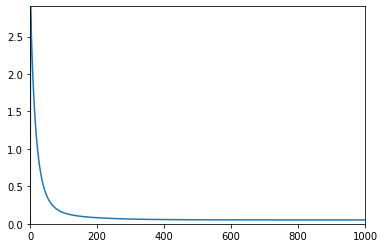

MSE: 0.0448


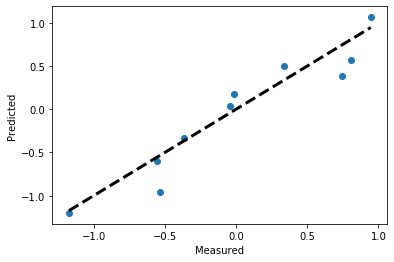

In [33]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()